In [1]:
library(tidyverse)
library(ggplot2)
library(tibble)
library(dplyr)
library(geosphere)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### 1)

In [2]:
# read_csv is from tidyverse, faster than read.csv

d1 <- read_csv('./Data_CitiBike/JC-201902-citibike-tripdata.csv')
d2 <- read_csv('./Data_CitiBike/JC-201903-citibike-tripdata.csv')
d3 <- read_csv('./Data_CitiBike/JC-201904-citibike-tripdata.csv')
d4 <- read_csv('./Data_CitiBike/JC-201905-citibike-tripdata.csv')
d5 <- read_csv('./Data_CitiBike/JC-201906-citibike-tripdata.csv')

Rows: 18565 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): start station name, end station name, usertype
dbl  (10): tripduration, start station id, start station latitude, start sta...
dttm  (2): starttime, stoptime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 23606 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): start station name, end station name, usertype
dbl  (10): tripduration, start station id, start station latitude, start sta...
dttm  (2): starttime, stoptime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 33056 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimit

#### 2)

In [3]:
# bind_rows() is useful for combining data frames wherein the columns are all identical
df <- bind_rows(d1, d2, d3, d4, d5)

In [4]:
str(df)

spc_tbl_ [150,792 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ tripduration           : num [1:150792] 142 223 106 370 315 ...
 $ starttime              : POSIXct[1:150792], format: "2019-02-01 15:35:02" "2019-02-01 17:00:46" ...
 $ stoptime               : POSIXct[1:150792], format: "2019-02-01 15:37:24" "2019-02-01 17:04:30" ...
 $ start station id       : num [1:150792] 3183 3183 3183 3183 3183 ...
 $ start station name     : chr [1:150792] "Exchange Place" "Exchange Place" "Exchange Place" "Exchange Place" ...
 $ start station latitude : num [1:150792] 40.7 40.7 40.7 40.7 40.7 ...
 $ start station longitude: num [1:150792] -74 -74 -74 -74 -74 ...
 $ end station id         : num [1:150792] 3639 3681 3184 3211 3273 ...
 $ end station name       : chr [1:150792] "Harborside" "Grand St" "Paulus Hook" "Newark Ave" ...
 $ end station latitude   : num [1:150792] 40.7 40.7 40.7 40.7 40.7 ...
 $ end station longitude  : num [1:150792] -74 -74 -74 -74 -74 ...
 $ bikeid                 : 

#### 3)

In [5]:
df <- drop_na(df) # drop rows with NA values

In [6]:
str(df)

# no rows removed due to NA values

tibble [150,792 × 15] (S3: tbl_df/tbl/data.frame)
 $ tripduration           : num [1:150792] 142 223 106 370 315 ...
 $ starttime              : POSIXct[1:150792], format: "2019-02-01 15:35:02" "2019-02-01 17:00:46" ...
 $ stoptime               : POSIXct[1:150792], format: "2019-02-01 15:37:24" "2019-02-01 17:04:30" ...
 $ start station id       : num [1:150792] 3183 3183 3183 3183 3183 ...
 $ start station name     : chr [1:150792] "Exchange Place" "Exchange Place" "Exchange Place" "Exchange Place" ...
 $ start station latitude : num [1:150792] 40.7 40.7 40.7 40.7 40.7 ...
 $ start station longitude: num [1:150792] -74 -74 -74 -74 -74 ...
 $ end station id         : num [1:150792] 3639 3681 3184 3211 3273 ...
 $ end station name       : chr [1:150792] "Harborside" "Grand St" "Paulus Hook" "Newark Ave" ...
 $ end station latitude   : num [1:150792] 40.7 40.7 40.7 40.7 40.7 ...
 $ end station longitude  : num [1:150792] -74 -74 -74 -74 -74 ...
 $ bikeid                 : num [1:150792]

#### 4)
**4.1)**

In [7]:
avg_trip_duration <- mean(df$tripduration)

median_trip_duration <- median(df$tripduration)

sprintf("Average trip duration: %.2f sec", avg_trip_duration)
sprintf("Median trip duration: %.2f sec", median_trip_duration)

[1] "Average trip duration: 768.64 sec"

[1] "Median trip duration: 341.00 sec"

**4.2)**

In [8]:
min_trip_duration <- min(df$tripduration)
max_trip_duration <- max(df$tripduration)

sprintf("Min trip duration: %.2f sec", min_trip_duration)
sprintf("Max trip duration: %.2f sec", max_trip_duration)

sprintf('max in hours: %.2f h', max_trip_duration/3600)

[1] "Min trip duration: 61.00 sec"

[1] "Max trip duration: 1729020.00 sec"

[1] "max in hours: 480.28 h"

There's a trip that's really really long ahah. Almost 20 days. Maybe some long excursion... (or, more likely, wrong data)

**4.3)**

In [9]:
df_clean <- df %>% filter(tripduration <= 3*3600)

In [10]:
avg_trip_duration_clean <- mean(df_clean$tripduration)

median_trip_duration_clean <- median(df_clean$tripduration)

sprintf("Average trip duration: %.2f sec", avg_trip_duration_clean)
sprintf("Median trip duration: %.2f sec", median_trip_duration_clean)

min_trip_duration_clean <- min(df_clean$tripduration)
max_trip_duration_clean <- max(df_clean$tripduration)

sprintf("Min trip duration: %.2f sec", min_trip_duration_clean)
sprintf("Max trip duration: %.2f sec", max_trip_duration_clean)

sprintf('max in hours: %.2f h', max_trip_duration_clean/3600)

[1] "Average trip duration: 553.38 sec"

[1] "Median trip duration: 340.00 sec"

[1] "Min trip duration: 61.00 sec"

[1] "Max trip duration: 10800.00 sec"

[1] "max in hours: 3.00 h"

**4.4)**

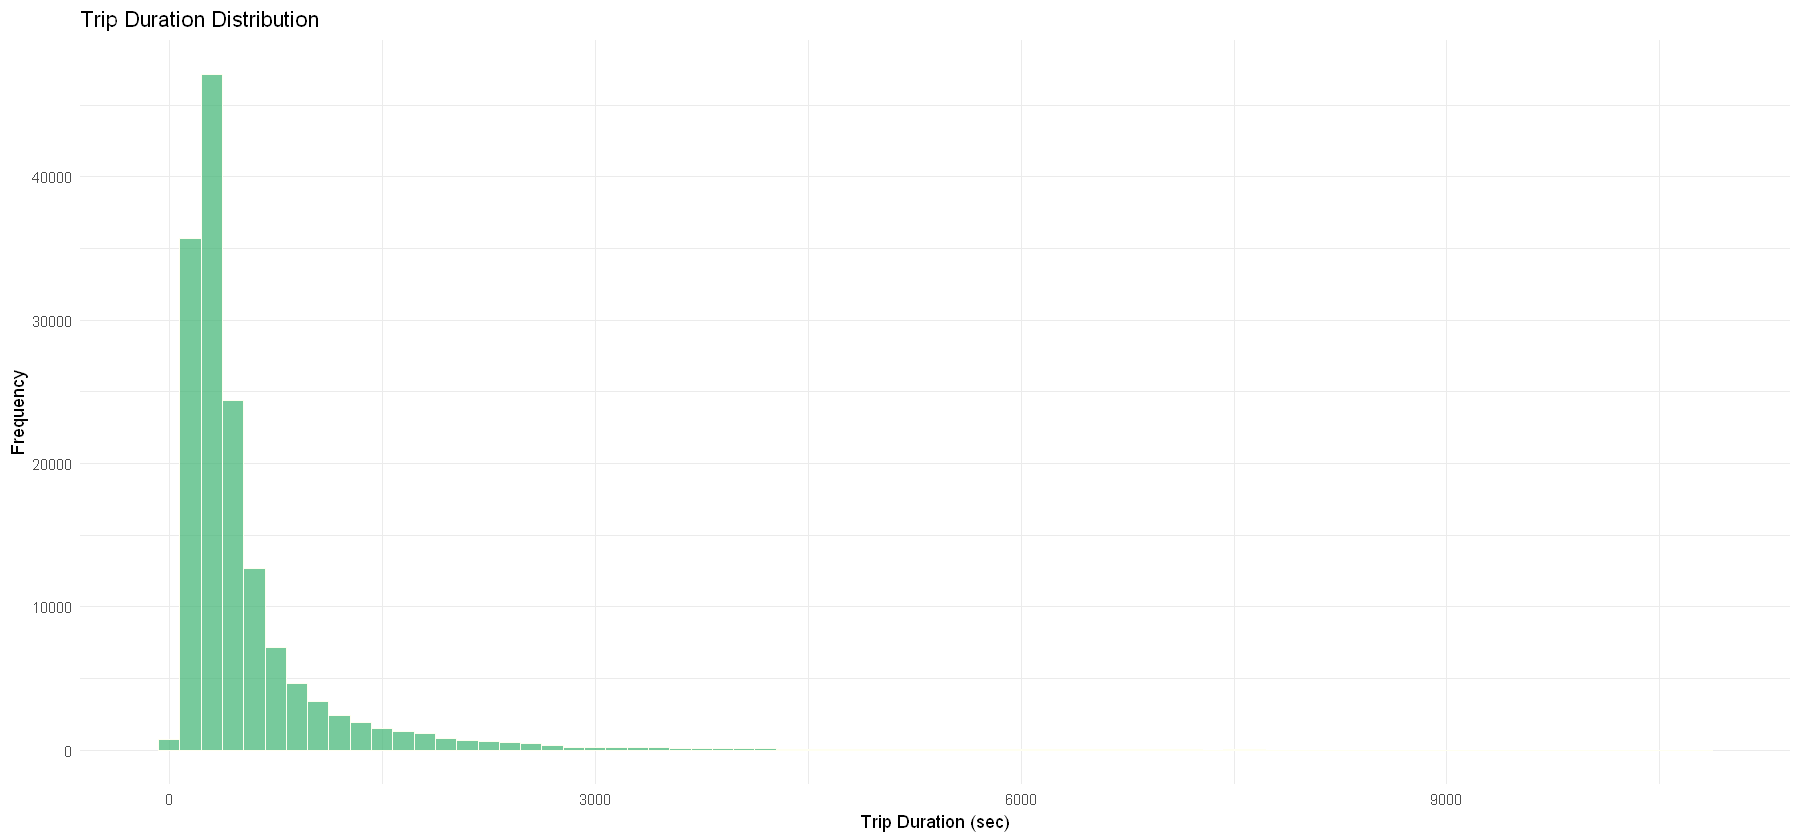

In [11]:
options(repr.plot.width = 15, repr.plot.height = 7)
time_duration_hist <- ggplot(data=df_clean, aes(x=tripduration)) + 
                        geom_histogram(binwidth=150, fill='mediumseagreen', color='ivory', alpha=0.7) +
                        labs(title='Trip Duration Distribution', x='Trip Duration (sec)', y='Frequency') +
                        # xlim(c(0, 3600)) +
                        theme_minimal()

time_duration_hist

#### 5)

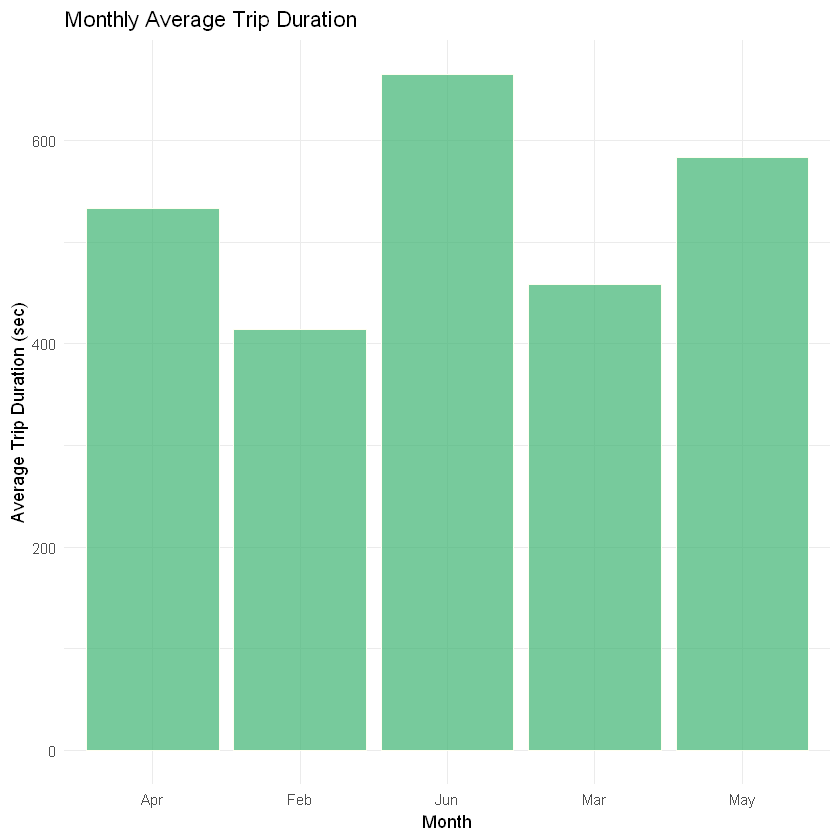

In [12]:
monthly_avg_trip_duration <- df_clean %>%
  mutate(month = lubridate::month(starttime)) %>% # mutate add a new col. lubridate::month() returns the month number
  group_by(month) %>%
  summarize(avg_trip_duration = mean(tripduration)) # summarize() is used to aggregate data by group

monthly_avg_trip_duration <- monthly_avg_trip_duration %>% mutate(month_w = c('Feb', 'Mar', 'Apr', 'May', 'Jun'))

options(repr.plot.width = 7, repr.plot.height = 7)

monthly_plot <- ggplot(data= monthly_avg_trip_duration, aes(x=month_w, y=avg_trip_duration)) + 
                  geom_bar(stat='identity', fill='mediumseagreen', color='ivory', alpha=0.7) +
                  labs(title='Monthly Average Trip Duration', x='Month', y='Average Trip Duration (sec)') +
                  theme_minimal()

monthly_plot

#### 6)
**6.1)**

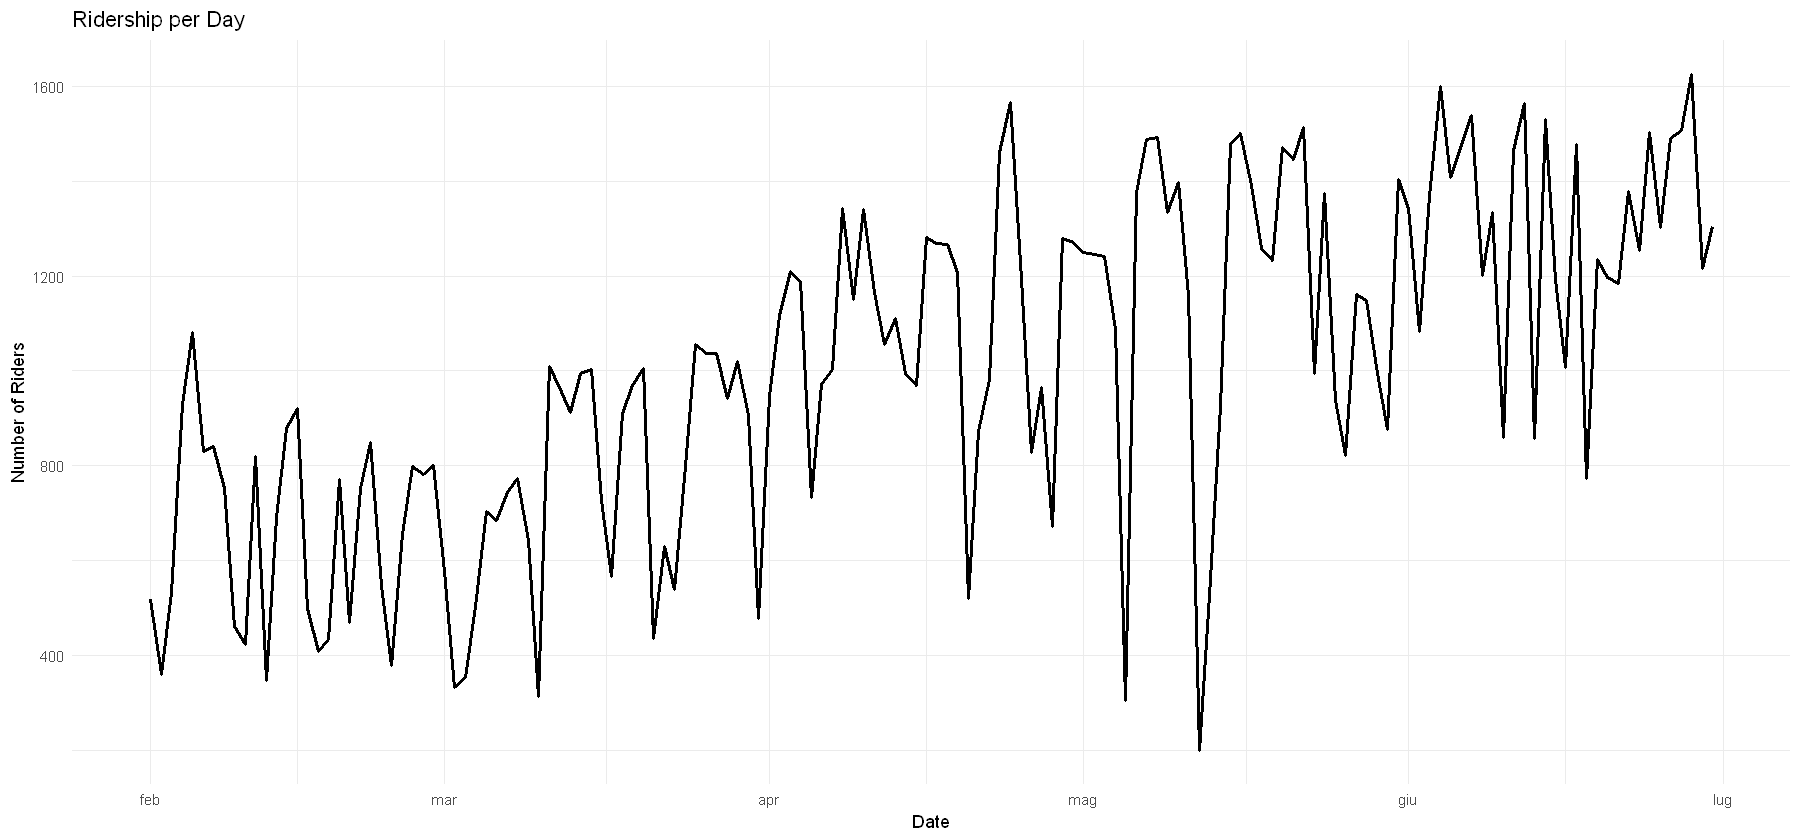

In [13]:
riders_per_day <- df_clean %>% 
mutate(date = as.Date(starttime)) %>% 
group_by(date) %>% 
summarize(riders = n())

options(repr.plot.width = 15, repr.plot.height = 7)

riders_per_day_plot <- ggplot(data=riders_per_day, aes(x=date, y=riders)) + 
                        geom_line(color='black', lwd=1) +
                        labs(title='Ridership per Day', x='Date', y='Number of Riders') +
                        theme_minimal()

riders_per_day_plot

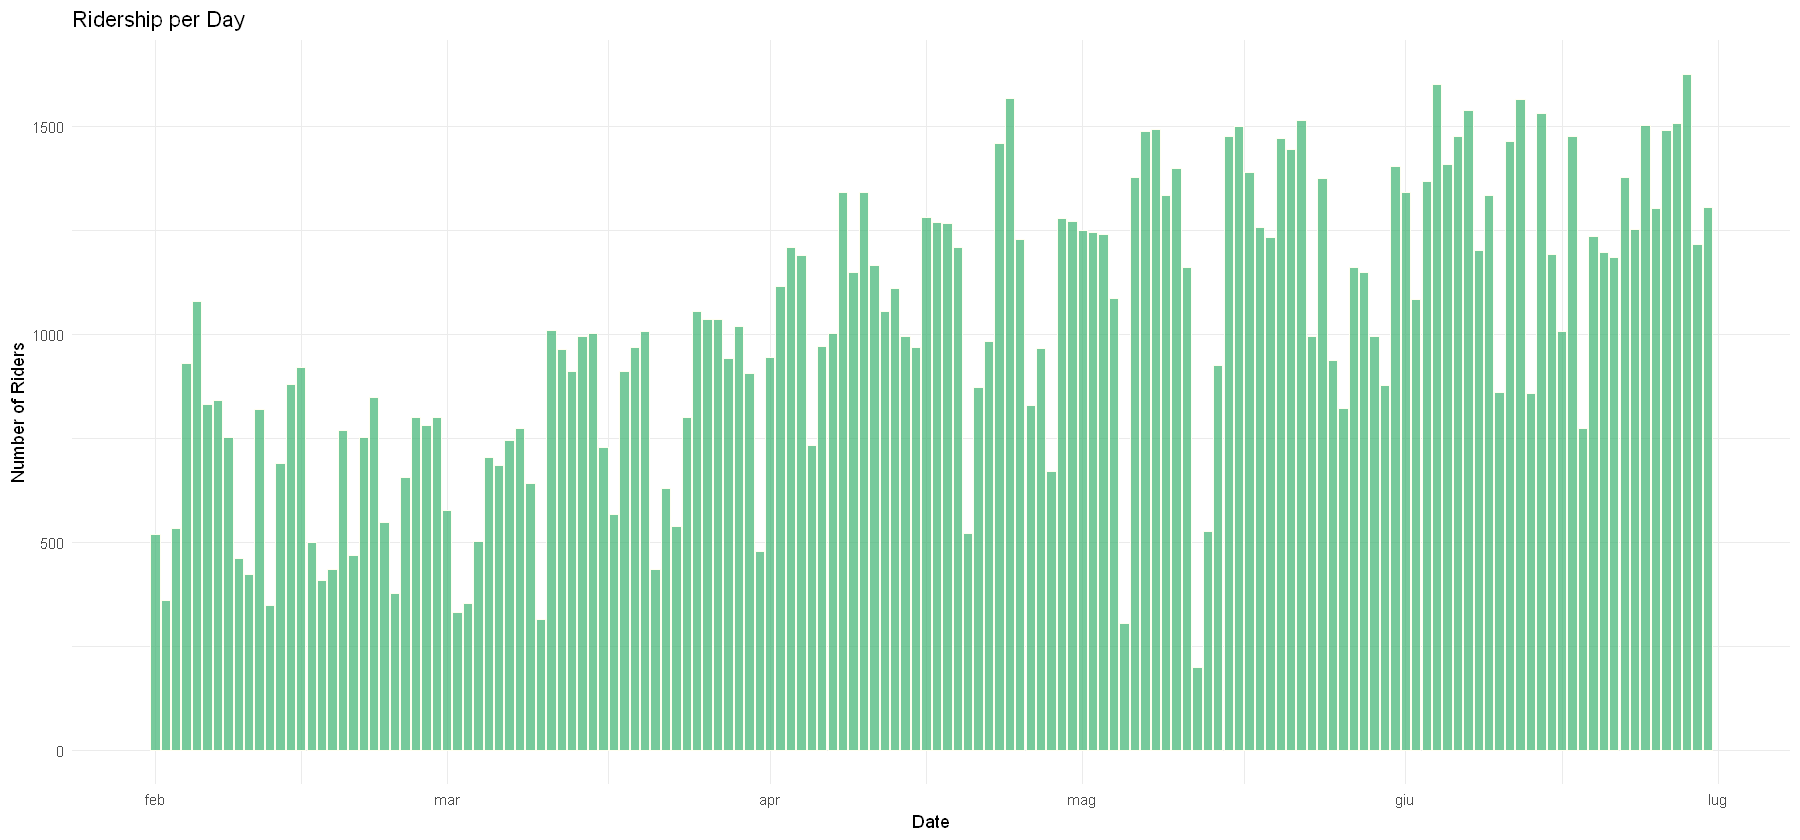

In [14]:
options(repr.plot.width = 15, repr.plot.height = 7)
riders_per_day_barplot <- ggplot(data=riders_per_day, aes(x=date, y=riders)) + 
                        geom_bar(stat='identity', fill='mediumseagreen', color='ivory', alpha=0.7) +
                        labs(title='Ridership per Day', x='Date', y='Number of Riders') +
                        theme_minimal()

riders_per_day_barplot

**6.2)**

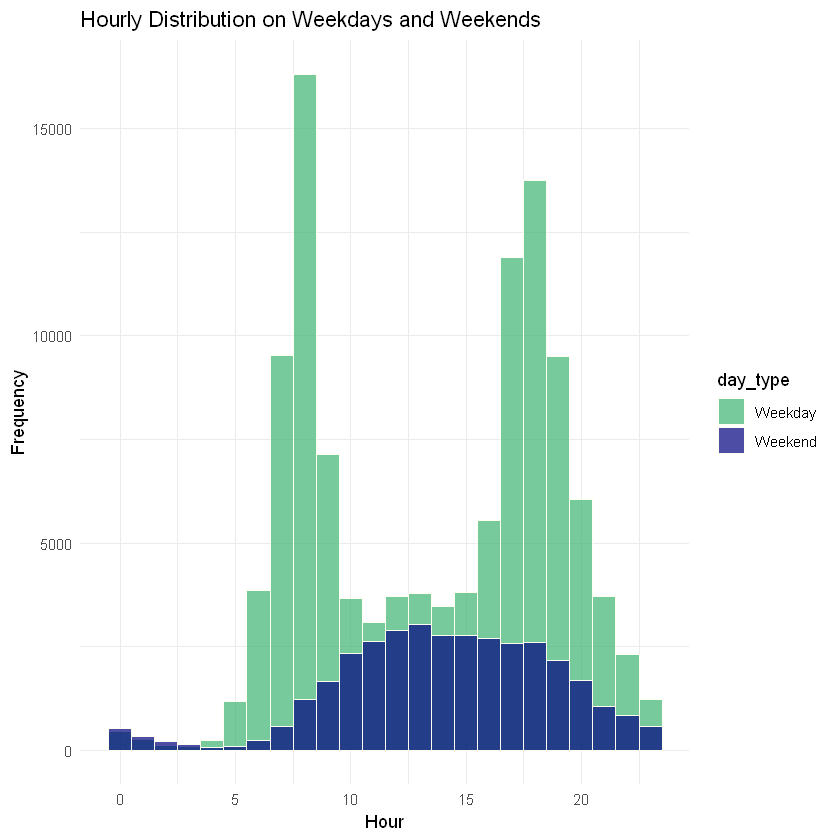

In [15]:
# Extract the day of the week from the starttime column
df_clean$weekday <- lubridate::wday(df_clean$starttime, label = TRUE, locale="EN-us")

# Create a new column to differentiate between weekdays and weekends
df_clean$day_type <- ifelse(df_clean$weekday %in% c("Sat", "Sun"), "Weekend", "Weekday")

# Extract the hour from the starttime column
df_clean$hour <- hour(df_clean$starttime)

# Plot the hourly distribution on weekdays and weekends
options(repr.plot.width = 7, repr.plot.height = 7)

hourly_distribution <- ggplot(data = df_clean, aes(x = hour, fill = day_type)) +
  geom_histogram(binwidth = 1, position = "identity", alpha = 0.7, color='ivory') +
  labs(title = "Hourly Distribution on Weekdays and Weekends", x = "Hour", y = "Frequency") +
  scale_fill_manual(values = c("Weekday" = "mediumseagreen", "Weekend" = "navy")) +
  theme_minimal()

hourly_distribution


**6.3)**

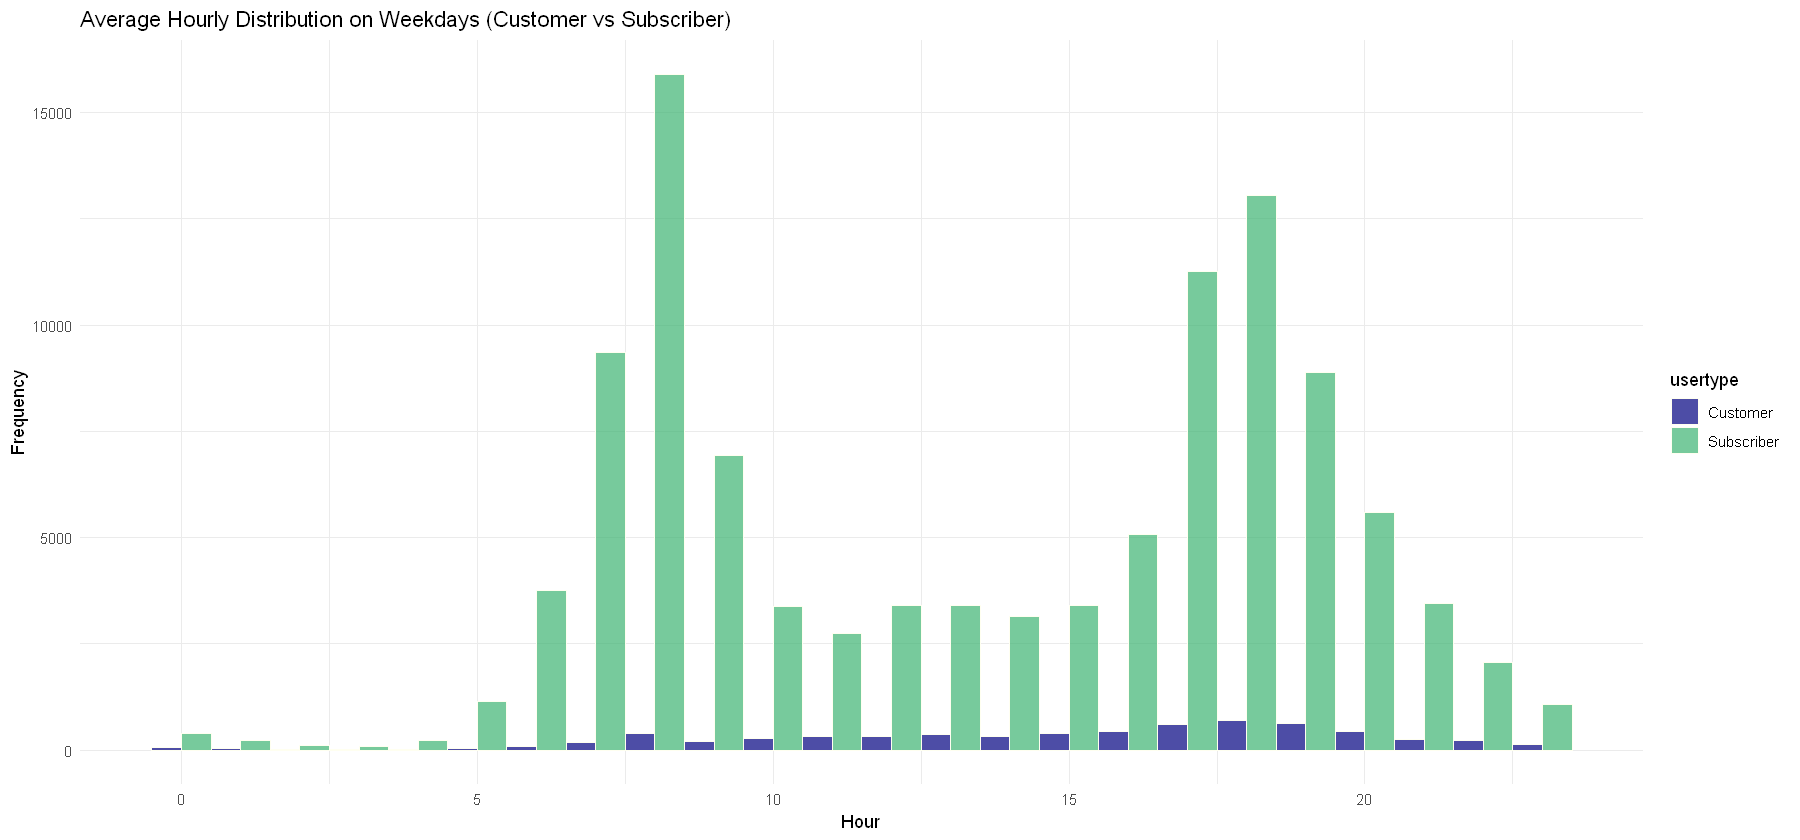

In [24]:
# Filter the data for weekdays
df_weekdays <- df_clean %>% filter(day_type == "Weekday")

# Group the data by hour and user type
hourly_distribution <- df_weekdays %>%
  group_by(hour, usertype) %>%
  # summarize(avg_count = mean(tripduration)) %>%
  ungroup()

# Plot the average hourly distribution on weekdays, separating customer and subscriber users

options(repr.plot.width = 15, repr.plot.height = 7)

hourly_plot <- ggplot(data = hourly_distribution, aes(x = hour, fill = usertype)) +
  geom_histogram(binwidth = 1, position = "dodge", alpha = 0.7, color='ivory') +
  labs(title = "Average Hourly Distribution on Weekdays (Customer vs Subscriber)",
       x = "Hour", y = "Frequency") +
  scale_fill_manual(values = c("Customer" = "navy", "Subscriber" = "mediumseagreen")) +
  theme_minimal()

hourly_plot


#### 7)
**7.1)**

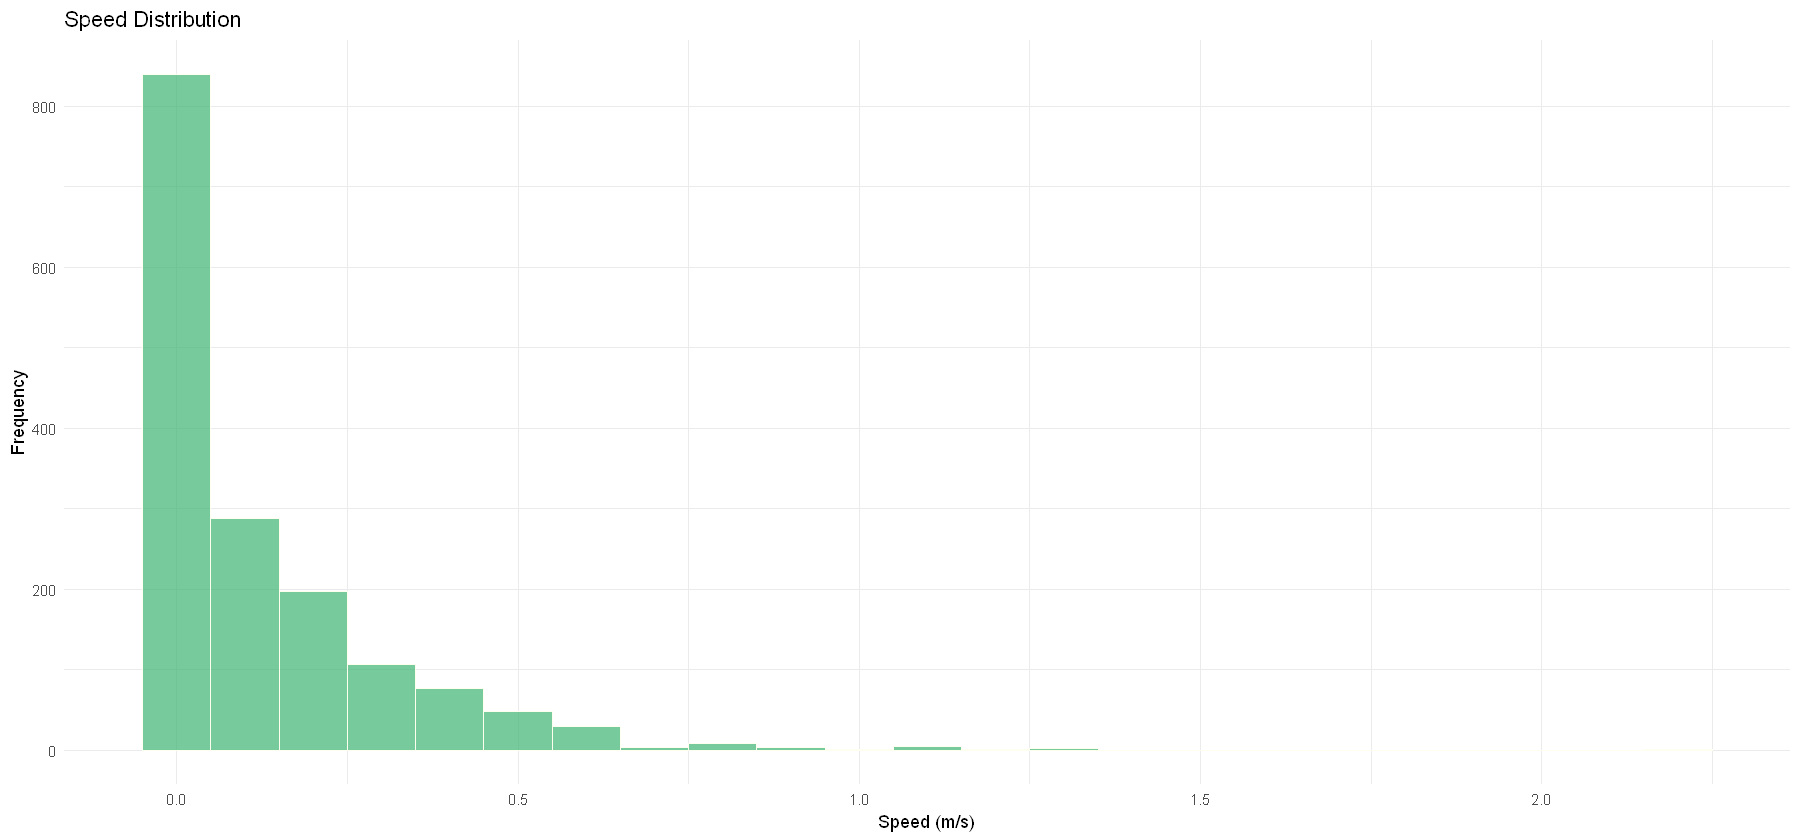

In [17]:
df_vel <- df_clean %>% filter(tripduration > 3600)

df_vel$dist <- distHaversine(cbind(df_vel$`start station longitude`, df_vel$`start station latitude`), 
                              cbind(df_vel$`end station longitude`, df_vel$`end station latitude`))

df_vel$speed <- (df_vel$dist / df_vel$tripduration)#*3.6

options(repr.plot.width = 15, repr.plot.height = 7)

speed_hist <- ggplot(data=df_vel, aes(x=speed)) + 
                geom_histogram(binwidth=0.1, fill='mediumseagreen', color='ivory', alpha=0.7) +
                labs(title='Speed Distribution', x='Speed (m/s)', y='Frequency') +
                theme_minimal()

speed_hist

**7.2)**

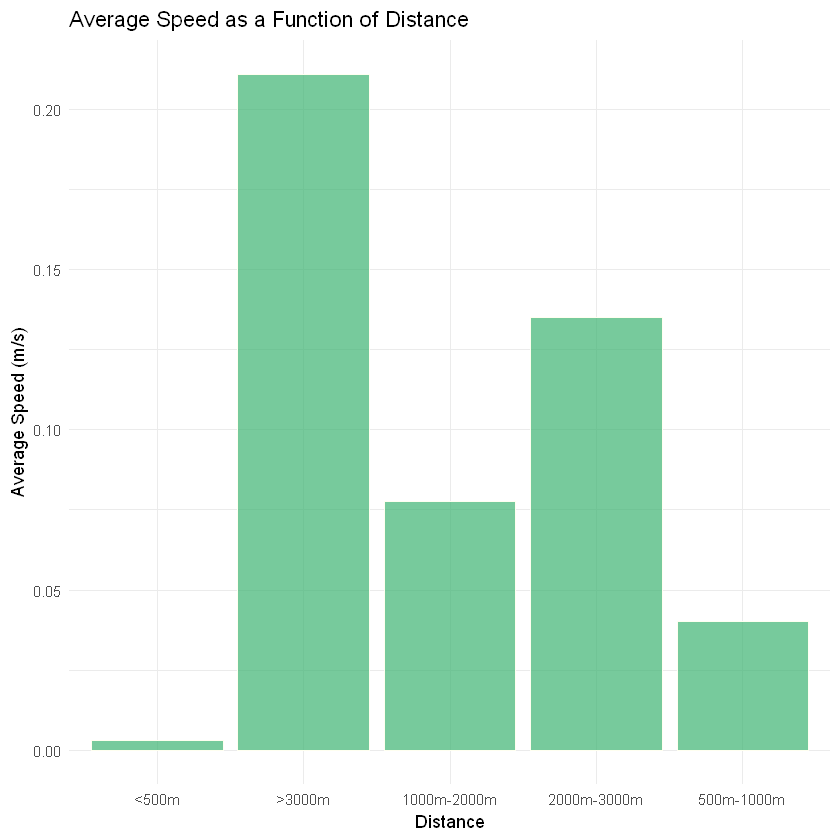

In [18]:
# Filter the data for the specified distance groups
df_group1 <- df_vel %>% filter(dist < 500)
df_group2 <- df_vel %>% filter(dist >= 500 & dist < 1000)
df_group3 <- df_vel %>% filter(dist >= 1000 & dist < 2000)
df_group4 <- df_vel %>% filter(dist >= 2000 & dist < 3000)
df_group5 <- df_vel %>% filter(dist >= 3000)

# Calculate the average speed for each distance group
avg_speed_group1 <- mean(df_group1$speed)
avg_speed_group2 <- mean(df_group2$speed)
avg_speed_group3 <- mean(df_group3$speed)
avg_speed_group4 <- mean(df_group4$speed)
avg_speed_group5 <- mean(df_group5$speed)

# Create a data frame for plotting
avg_speed_dist <- data.frame(group_dist = c("<500m", "500m-1000m", "1000m-2000m", "2000m-3000m", ">3000m"), 
                                avg_speed = c(avg_speed_group1, avg_speed_group2, avg_speed_group3, 
                                                avg_speed_group4, avg_speed_group5))

options(repr.plot.width = 7, repr.plot.height = 7)

# Plot the average speed as a function of distance
speed_distance_plot <- ggplot(data = avg_speed_dist, aes(x = group_dist, y = avg_speed/3.6)) +
                        geom_bar(stat = "identity", fill = "mediumseagreen", color = "ivory", alpha = 0.7) +
                        labs(title = "Average Speed as a Function of Distance",
                        x = "Distance", y = "Average Speed (m/s)") +
                        theme_minimal()

speed_distance_plot


**7.3)**

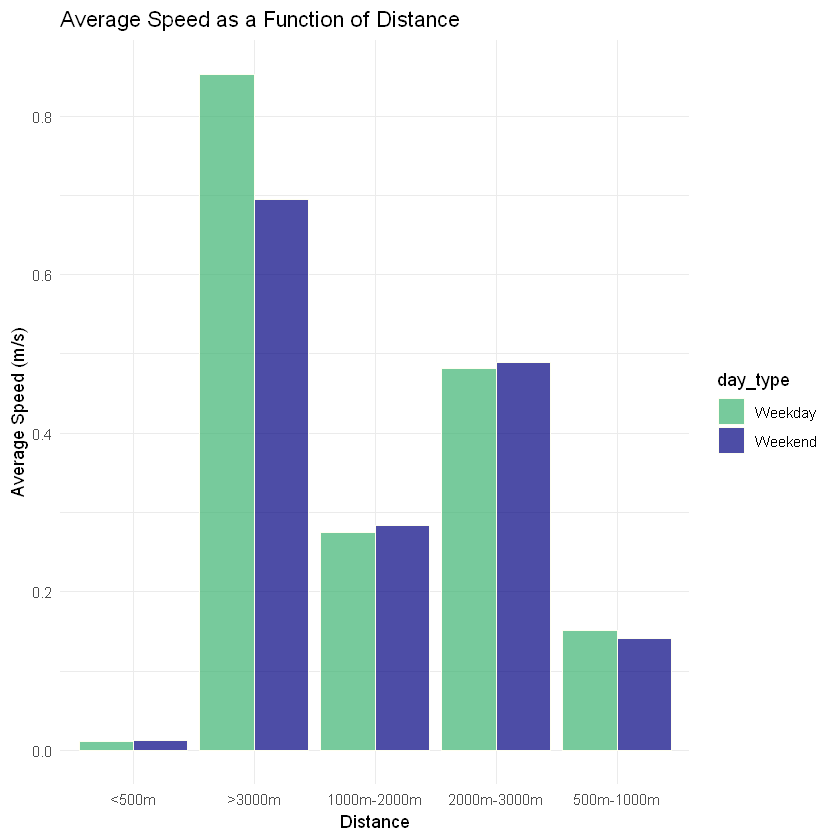

In [23]:
# Filter the data for weekdays
df_weekday <- df_vel %>% filter(day_type == "Weekday")

# Filter the data for weekends
df_weekend <- df_vel %>% filter(day_type == "Weekend")

# Now you can perform the same operations on df_weekday and df_weekend as before
# For example, for weekdays:

# Filter the data for the specified distance groups
df_group1d <- df_weekday %>% filter(dist < 500)
df_group2d <- df_weekday %>% filter(dist >= 500 & dist < 1000)
df_group3d <- df_weekday %>% filter(dist >= 1000 & dist < 2000)
df_group4d <- df_weekday %>% filter(dist >= 2000 & dist < 3000)
df_group5d <- df_weekday %>% filter(dist >= 3000)

df_group1w <- df_weekend %>% filter(dist < 500)
df_group2w <- df_weekend %>% filter(dist >= 500 & dist < 1000)
df_group3w <- df_weekend %>% filter(dist >= 1000 & dist < 2000)
df_group4w <- df_weekend %>% filter(dist >= 2000 & dist < 3000)
df_group5w <- df_weekend %>% filter(dist >= 3000)

# Calculate the average speed for each distance group
avg_speed_group1d <- mean(df_group1d$speed)
avg_speed_group2d <- mean(df_group2d$speed)
avg_speed_group3d <- mean(df_group3d$speed)
avg_speed_group4d <- mean(df_group4d$speed)
avg_speed_group5d <- mean(df_group5d$speed)

avg_speed_group1w <- mean(df_group1w$speed)
avg_speed_group2w <- mean(df_group2w$speed)
avg_speed_group3w <- mean(df_group3w$speed)
avg_speed_group4w <- mean(df_group4w$speed)
avg_speed_group5w <- mean(df_group5w$speed)

# Create a data frame for plotting
avg_speed_distd <- data.frame(group_dist = c("<500m", "500m-1000m", "1000m-2000m", "2000m-3000m", ">3000m"), 
                                avg_speed = c(avg_speed_group1d, avg_speed_group2d, avg_speed_group3d, 
                                                avg_speed_group4d, avg_speed_group5d),
                                day_type = 'Weekday')

avg_speed_distw <- data.frame(group_dist = c("<500m", "500m-1000m", "1000m-2000m", "2000m-3000m", ">3000m"), 
                                avg_speed = c(avg_speed_group1w, avg_speed_group2w, avg_speed_group3w, 
                                                avg_speed_group4w, avg_speed_group5w), 
                                day_type = 'Weekend')

df_avg_speed_dist <- rbind(avg_speed_distd, avg_speed_distw)   

options(repr.plot.width = 7, repr.plot.height = 7)

# Plot the average speed as a function of distance
speed_distance_plotwd <- ggplot(data = df_avg_speed_dist, aes(x = group_dist, y = avg_speed, fill=day_type)) +
                            geom_bar(position='dodge', stat = "identity", alpha = 0.7, color='ivory') +
                            labs(title = "Average Speed as a Function of Distance",
                            x = "Distance", y = "Average Speed (m/s)") +
                            scale_fill_manual(values = c("Weekday" = "mediumseagreen", "Weekend" = "navy")) +
                            theme_minimal()

speed_distance_plotwd

#### 8)
**8.1)**

In [20]:
start_station <- df_clean %>% group_by(`start station name`) %>% summarize(count = n()) %>% arrange(desc(count))

end_station <- df_clean %>% group_by(`end station name`) %>% summarize(count = n()) %>% arrange(count)

sprintf('Most common start station --> %s', start_station$`start station name`[1])
sprintf('Least popular end station --> %s', end_station$`end station name`[1])

[1] "Most common start station --> Grove St PATH"

[1] "Least popular end station --> 1 Ave & E 16 St"

**8.2)**

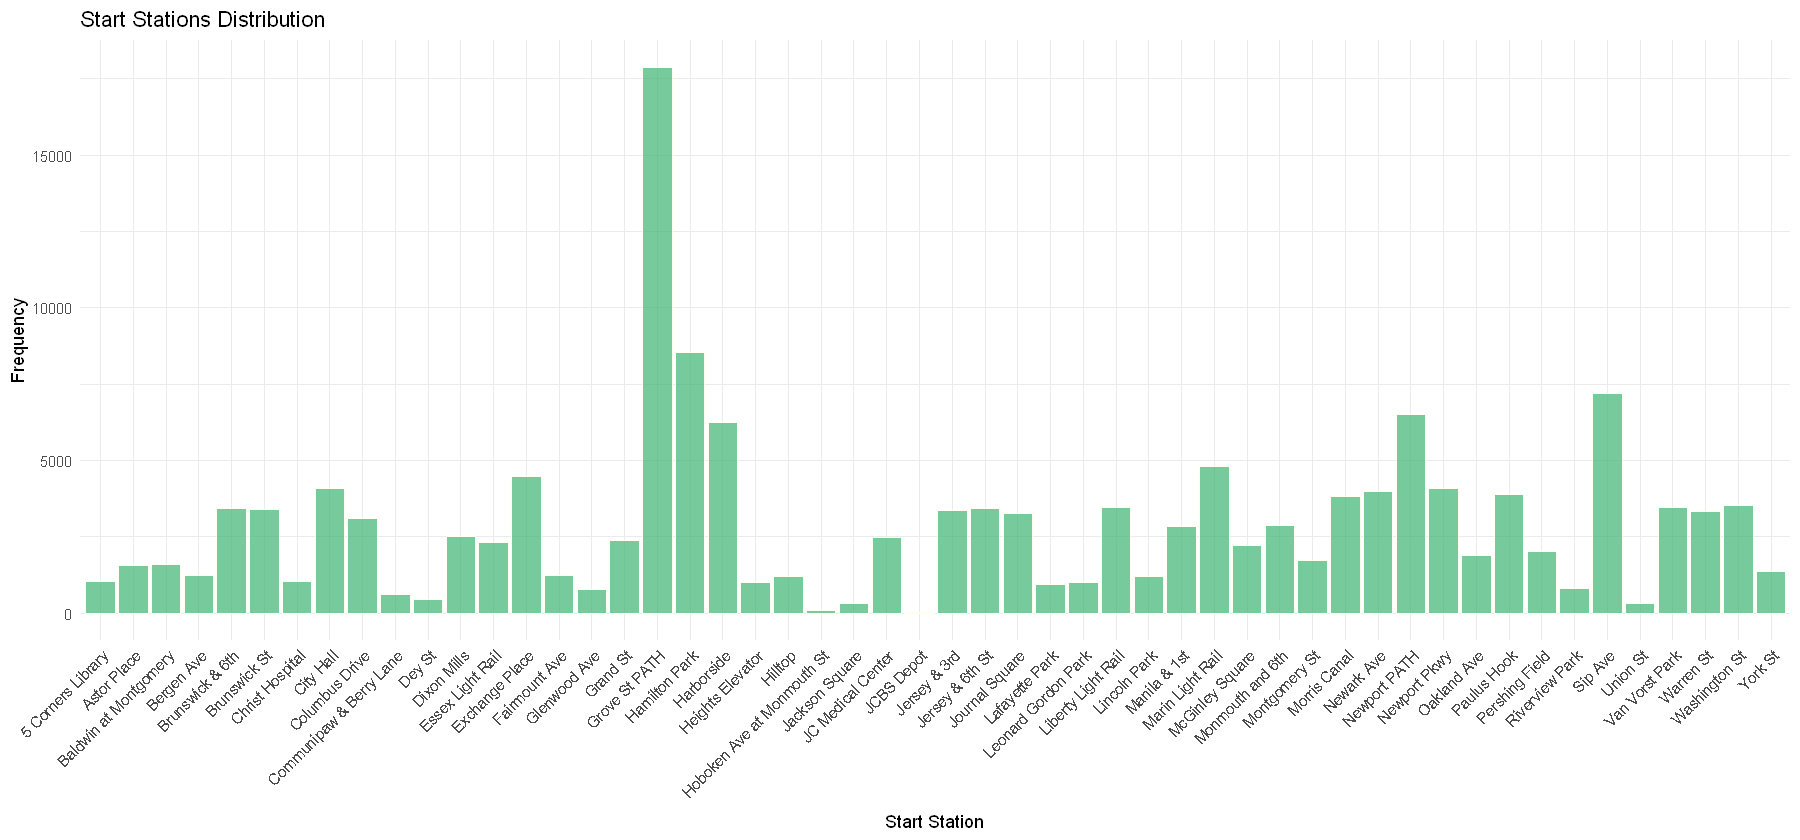

In [21]:
start_station <- df_clean %>% group_by(`start station name`) #%>% summarize(count = n())

# start_station

options(repr.plot.width = 15, repr.plot.height = 7)

# start_distr <- ggplot(data=start_station, aes(x=`start station name`)) +
#                 geom_histogram(stat='count', binwidth = 1, fill='mediumseagreen', color='ivory', alpha=0.7) +
#                 labs(title='Start Station Distribution', x='Start Station', y='Frequency')
#                 theme_minimal()+
#                 theme(axis.text.x = element_text(angle = 45, hjust = 1))

start_distr <- ggplot(data=start_station, aes(x=`start station name`)) +
                geom_bar(fill='mediumseagreen', color='ivory', alpha=0.7) +
                labs(title='Start Stations Distribution', x='Start Station', y='Frequency') +
                theme_minimal() +
                theme(axis.text.x = element_text(angle = 45, hjust = 1))

start_distr

**8.3)**

In [22]:
common_route <- df_clean %>% group_by(`start station name`, `end station name`) %>% summarize(count = n()) %>% arrange(desc(count))

least_route <- df_clean %>% group_by(`start station name`, `end station name`) %>% summarize(count = n()) %>% arrange(count)

cat('\n3 most common routes:\n')
for (i in 1:3) {
    print(sprintf('%s --> %s', common_route$`start station name`[i], common_route$`end station name`[i]))
}

cat('\n3 least popular routes:\n')
for (i in 1:3) {
    print(sprintf('%s --> %s', least_route$`start station name`[i], least_route$`end station name`[i]))
}


`summarise()` has grouped output by 'start station name'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'start station name'. You can override
using the `.groups` argument.



3 most common routes:
[1] "Hamilton Park --> Grove St PATH"
[1] "Grove St PATH --> Hamilton Park"
[1] "Brunswick & 6th --> Grove St PATH"

3 least popular routes:
[1] "5 Corners Library --> Dixon Mills"
[1] "5 Corners Library --> Grand St"
[1] "Astor Place --> Brunswick & 6th"
